In [1]:
using DataFrames
using DataStructures
using Plots
using Distributions
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

In [2]:
odds(p) = p / (1 - p)

odds (generic function with 1 method)

In [3]:
odds(0.75)

3.0

In [4]:
odds(0.1)

0.11111111111111112

In [5]:
odds(0.9)

9.000000000000002

In [6]:
prob(o) = o / (o+1)

prob (generic function with 1 method)

In [7]:
prob(3/2)

0.6

In [8]:
prob2(y, n) = y / (y + n)

prob2 (generic function with 1 method)

In [9]:
prob2(3, 2)

0.6

## Oliver's blood

In [10]:
like1= 0.01
like2=2 * 0.6 * 0.01
likelihood_ratio=like1 / like2

0.8333333333333334

In [11]:
post_odds= 1 * like1 / like2
prob(post_odds)

0.45454545454545453

In [12]:
odds(.9)

9.000000000000002

In [13]:
post_odds= odds(0.9) * like1 / like2
prob(post_odds)

0.8823529411764706

In [14]:
post_odds = odds(0.1) * like1 / like2
prob(post_odds)

0.0847457627118644

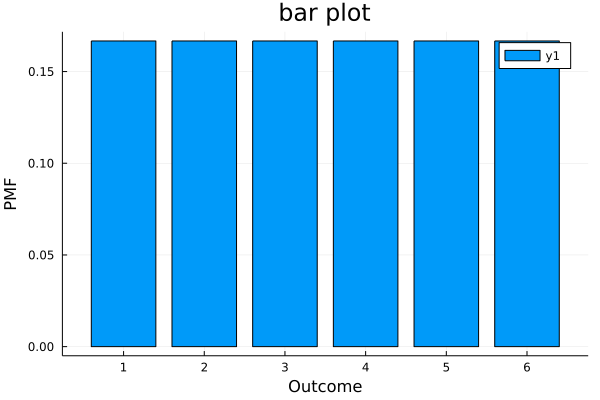

In [15]:
function make_die(sides)
    outcomes=1:sides
    pmf_from_seq(outcomes)
end
die = make_die(6)
bar(die, xaxis=("Outcome"), yaxis=("PMF"))

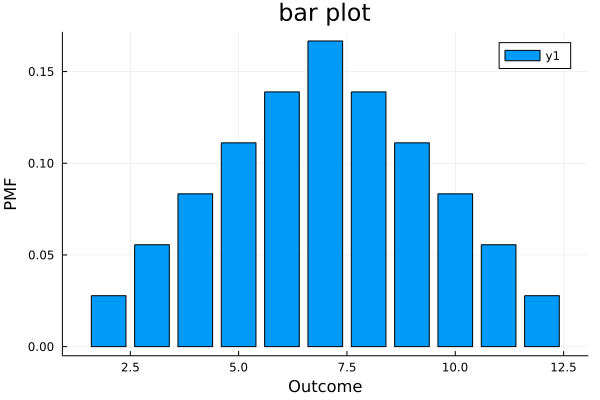

In [16]:
twice=add_dist(die, die)
bar(twice, xaxis=("Outcome"), yaxis=("PMF"))

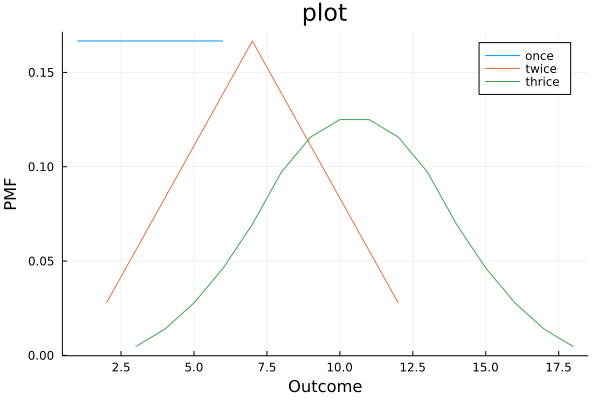

In [17]:
thrice=reduce(add_dist, fill(die, 3))
plot(die, xaxis=("Outcome"), yaxis=("PMF"), label="once")
plot!(twice, label="twice")
plot!(thrice, label="thrice")


## The Forward Problem

In [18]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.40);

In [19]:
dist_total = add_dist(dist_sensitive, dist_insensitive);

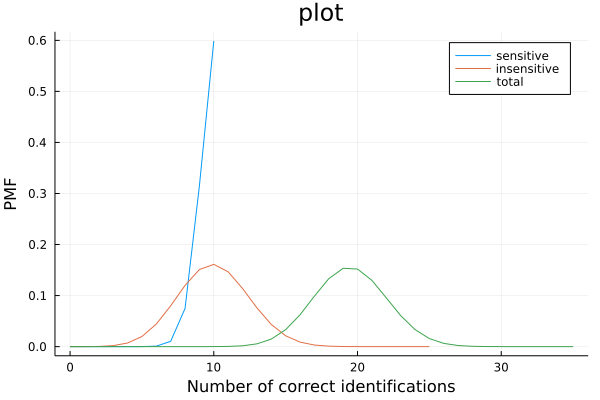

In [20]:
plot(dist_sensitive, xaxis=("Number of correct identifications"), yaxis=("PMF"), label="sensitive")
plot!(dist_insensitive, label="insensitive")
plot!(dist_total, label="total")

## The Inverse Problem

In [21]:
function do_sensitive(num_sensitive, n)
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    probs(add_dist(dist_sensitive, dist_insensitive))
end

table=DataFrame(vcat([0:n], [do_sensitive(ns, n) for ns in 0:n]), vcat([:Index], [Symbol("A"*string(x)) for x in 0:n])) 
first(table, 6)


,Index,A0,A1,A2,A3,A4,A5
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,1.71907e-8,1.43256e-9,1.1938e-10,9.94833e-12,8.29027e-13,6.90856e-14
2,1,4.01117e-7,5.969e-8,7.16279e-9,7.79286e-10,8.01393e-11,7.94484e-12
3,2,4.54599e-6,9.7414e-7,1.70912e-7,2.50643e-8,3.26913e-9,3.94018e-10
4,3,3.33372e-5,9.32649e-6,2.20565e-6,4.37706e-7,7.39812e-8,1.10785e-8
5,4,0.000177799,6.13829e-5,1.84117e-5,4.73479e-6,1.03828e-6,1.96274e-7
6,5,0.000734901,0.000301834,0.000110068,3.51677e-5,9.73521e-6,2.32436e-6


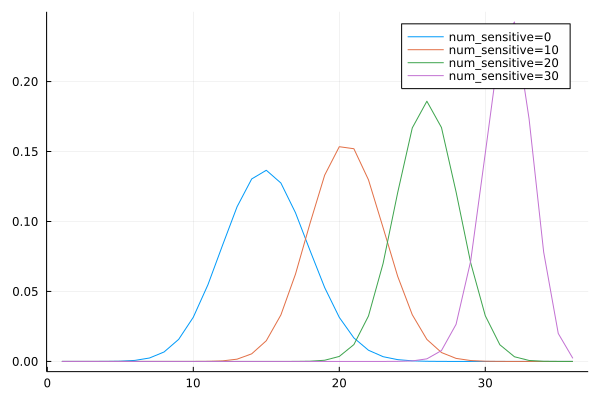

In [22]:
plot(table[!, :A0], label="num_sensitive=0")
plot!(table[!, :A10], label="num_sensitive=10")
plot!(table[!, :A20], label="num_sensitive=20")
plot!(table[!, :A30], label="num_sensitive=30")

In [23]:
likelihood1 = Iterators.drop(values(loc(table, 12)), 1);

In [24]:
hypos = 0:n
prior=pmf_from_seq(hypos);

In [25]:
posterior1=prior * likelihood1;

In [26]:
likelihood2 = Iterators.drop(values(loc(table, 20)), 1)
posterior2=prior * likelihood2;

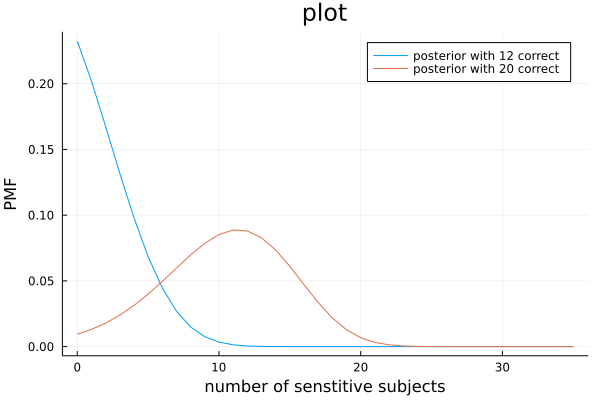

In [27]:
plot(posterior1, xaxis=("number of senstitive subjects"), yaxis=("PMF"), label="posterior with 12 correct")
plot!(posterior2, label=("posterior with 20 correct"))

In [28]:
max_prob(posterior1)

0

In [29]:
max_prob(posterior2)

11

## Exercises

_exercise 6.1_

In [30]:
prior=odds(1/3)

0.49999999999999994

In [31]:
likelihood=2*1.25

2.5

In [32]:
prob(prior*likelihood)

0.5555555555555555

_exercise 6.2_

In [33]:
prior_odds=odds(0.1)
post_odds = prior_odds* (odds(2/3)^3)

0.8888888888888886

In [34]:
prob(post_odds)

0.4705882352941176

_exercise 6.3_

In [35]:
prior_odds=odds(0.14)
post_odds=prior_odds * 25
prob(post_odds)

0.8027522935779816

_exercise 6.4_

In [36]:
d = pmf_from_seq(1:6)
# dist of goblin protection
goblin=add_dist(d, d)
# amount of damage after a roll of the die 
damage=add_dist(d, 3)

6×2 DataFrame
 Row │ a      b        
     │ Int64  Float64  
─────┼─────────────────
   1 │     4  0.166667
   2 │     5  0.166667
   3 │     6  0.166667
   4 │     7  0.166667
   5 │     8  0.166667
   6 │     9  0.166667

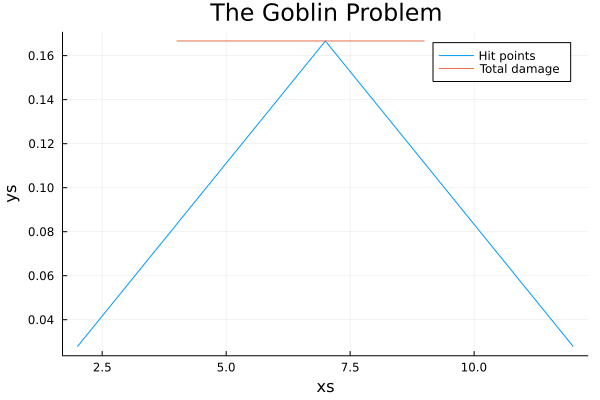

In [38]:
plot(goblin, label="Hit points", plot_title="The Goblin Problem")
plot!(damage, label="Total damage")

In [39]:
points_left = sub_dist(goblin, damage)
prob_le(points_left, 0)

0.5